In [2]:
import numpy as np
import pandas as pd


In [3]:
df=pd.read_csv('CleanedTravel.csv')

In [4]:
df.head()

,Unnamed: 0,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [5]:
x=df.drop('ProdTaken',axis=1)
y=df['ProdTaken']

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [7]:
cat_features = x.select_dtypes(include="object").columns
print(cat_features)

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')


In [8]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first')
encoded=encoder.fit_transform(x_train[cat_features]).toarray()
one_hot_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out(cat_features),index=x_train.index)
x_train=pd.concat([x_train,one_hot_df],axis=1).drop(columns=cat_features)


In [9]:

encoded=encoder.transform(x_test[cat_features]).toarray()
one_hot_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out(cat_features),index=x_test.index)
x_test=pd.concat([x_test,one_hot_df],axis=1).drop(columns=cat_features)


In [11]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       999
           1       0.78      0.42      0.55       223

    accuracy                           0.87      1222
   macro avg       0.83      0.70      0.74      1222
weighted avg       0.86      0.87      0.86      1222



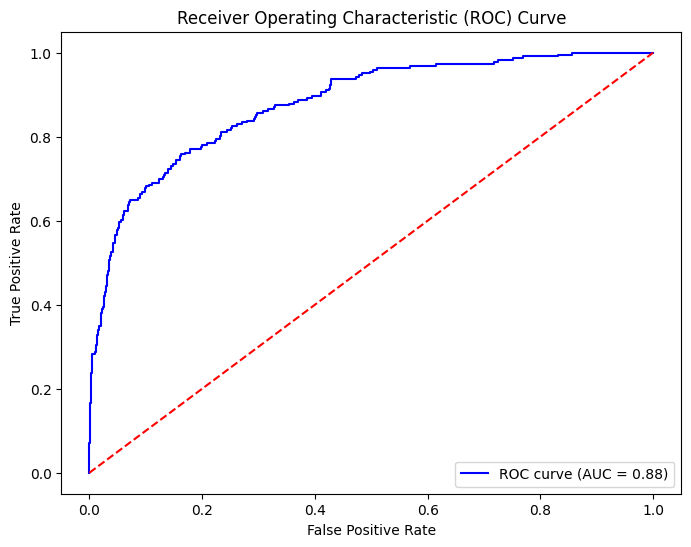

In [13]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_prob = model.predict_proba(x_test)[:, 1]  


fpr, tpr, thresholds = roc_curve(y_test, y_prob)


roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

HpyerParameter Tuning:


In [18]:
from sklearn.model_selection import RandomizedSearchCV
gradient_params={"loss": ['log_loss','deviance','exponential'],
             "criterion": ['friedman_mse','squared_error','mse'],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500],
              "max_depth": [5, 8, 15, None, 10]
                }
grid=RandomizedSearchCV(model,param_distributions=gradient_params,cv=5,n_jobs=-1)
grid.fit(x_train,y_train)


c:\Users\vatsa\Downloads\KrishNaikML\venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\vatsa\Downloads\KrishNaikML\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\vatsa\Downloads\KrishNaikML\venv\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\vatsa\Downloads\KrishNaikML\venv\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_paramet

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse'],
                                        'loss': ['log_loss', 'deviance',
                                                 'exponential'],
                                        'max_depth': [5, 8, 15, None, 10],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [100, 200, 500]})

In [19]:
grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 15,
 'max_depth': None,
 'loss': 'log_loss',
 'criterion': 'squared_error'}

In [20]:
tunedModel=GradientBoostingClassifier(n_estimators=100,min_samples_split=15,max_depth=None,loss='log_loss',criterion='squared_error')
tunedModel.fit(x_train,y_train)
y_prednew=tunedModel.predict(x_test)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_prednew))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       999
           1       0.95      0.74      0.84       223

    accuracy                           0.95      1222
   macro avg       0.95      0.87      0.90      1222
weighted avg       0.95      0.95      0.94      1222



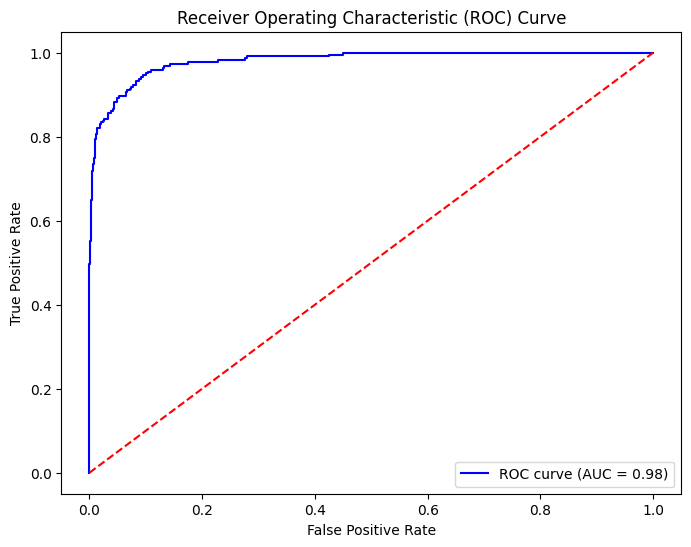

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_prob = tunedModel.predict_proba(x_test)[:, 1]  


fpr, tpr, thresholds = roc_curve(y_test, y_prob)


roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()